In [115]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn import preprocessing
import squarify 

In [116]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [117]:
saved_style_state = matplotlib.rcParams.copy()

In [118]:
from IPython.display import HTML

In [119]:
monthslist = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthdict = {'Jan':31, 'Feb':28.25, 'Mar':31, 'Apr':30, 'May':31, 'Jun':30, 'Jul':31, \
             'Aug':31, 'Sep':30, 'Oct':31, 'Nov':30, 'Dec':31}
statecolors = ['#61546D', '#59C6C3', '#CFF262', '#FF5C68', '#CC4256', '#EFB94F', '#2ABC71','#F1BD96']
monthcolors = ['#53093B', '#C6124E', '#EC6D02', '#F9C300', '#F1E802', '#9A8D0F']
yeargradient = ['#1C2916', '#212F16', '#273517', '#2D3C17', '#334218', '#394918', '#3F4F19','#45551A', '#4A5C1A', '#50621B', '#56691B', '#5C6F1C', '#62761C', '#687C1D', '#6E821E', '#74891E', '#798F1F', '#7F961F', '#859C20', '#8BA221', '#91A921', '#97AF22', '#9DB622', '#A3BC23', '#A8C323', '#AEC924', '#B4CF25', '#BAD625', '#C0DC26', '#C6E326', '#CCE927', '#D2F028']
ygb = ["#221a7c", "#2548a4", "#0089c0", "#00bac7", "#6cd6bc", "#94d4bc", "#c7f4b2", "#f0ffc0"]
ygbb = ["#221a7c",'#1D348E', "#2548a4", '#1369B2', "#0089c0", "#00bac7", "#6cd6bc", "#94d4bc", "#c7f4b2", "#f0ffc0"]
ygblong = ['#221A7C','#202785','#1D348E','#1B4297', '#184FA0', '#165CA9'  , '#1369B2', '#0979B9',"#0089c0", '#0095C2', '#00A2C4', '#00AEC5', \
         '#00BAC7', '#16C0C5','#2BC5C3', '#41CBC0', '#56D0BE', '#6CD6BC', '#77DABB',  '#83DEBA', '#8EE1B8',  '#9AE5B7', \
          '#A5E9B6', '#B0EDB5', '#BCF0B3', '#C7F4B2', '#CCF5B4', '#D1F7B6', '#DCFAB9', '#E6FCBD', '#F0FFC0']
ygblongg=[]
for i in range(0,20):
    ygblongg.append(ygblong[i])
    ygblongg.append(ygblong[i])
ygblonggg=[]
ygbowo =[]
for i in range(0,19):
    ygbowo.append(ygblong[i])
for i in range(0,19):
    ygblonggg.append(ygblong[19-i])
for i in range(0,30):
    ygblonggg.append(ygblong[i])
    ygblonggg.append(ygblong[i])
    ygblonggg.append(ygblong[i])

# Australian Road Deaths Database 
#### Provided by the Bureau of Infrastructure, Transport and Regional Economics.
#### Visualised by Christopher Wang https://github.com/chriswng z5210318
The Australian Road Deaths Database provides basic details of road transport crash fatalities in Australia as reported by the police each month to the State and Territory road safety authorities.
The dataset is updated each month and has data reaching back to Jan 1989. (Accessed July 2019)

Available: https://www.bitre.gov.au/statistics/safety/fatal_road_crash_database.aspx


## Details provided in the database fall into two groups:

1. The circumstances of the crash, for example, location, crash type, day of week, time.

In [120]:
def gettingdata(filepath):
    if os.path.isfile(filepath):

        print("loading from file")
        print("done")
    else:
        print("Put ur file there")
    return(pd.read_csv(filepath, low_memory=False))
    #returns dataframe

In [121]:
crashdf = gettingdata("bitre_ardd_fatal_crashes_jun_2019.csv")


loading from file
done


2. Some details regarding the persons killed, for example, age, gender and road user group.

In [122]:
fataldf =gettingdata("bitre_ardd_fatalities_jun_2019.csv")
    

loading from file
done


In [123]:
dfinal = crashdf.merge(fataldf, on="Crash ID", how = 'inner') #inner is a natural join

In [124]:
dfinal.columns

Index(['Crash ID', 'State_x', 'Month_x', 'Year_x', 'Dayweek_x', 'Time_x',
       'Crash Type_x', 'Number Fatalities', 'Bus Involvement_x',
       'Heavy Rigid Truck Involvement_x', 'Articulated Truck Involvement_x',
       'Speed Limit_x', 'National Remoteness Areas_x', 'SA4 Name 2016_x',
       'National LGA Name 2017_x', 'National Road Type_x',
       'Christmas Period_x', 'Easter Period_x', 'Day of week_x', 'Time of Day',
       'State_y', 'Month_y', 'Year_y', 'Dayweek_y', 'Time_y', 'Crash Type_y',
       'Bus Involvement_y', 'Heavy Rigid Truck Involvement_y',
       'Articulated Truck Involvement_y', 'Speed Limit_y', 'Road User',
       'Gender', 'Age', 'National Remoteness Areas_y', 'SA4 Name 2016_y',
       'National LGA Name 2017_y', 'National Road Type_y',
       'Christmas Period_y', 'Easter Period_y', 'Age Group', 'Day of week_y',
       'Time of day'],
      dtype='object')

In [125]:
for column in dfinal:
    if column[-2] == "_":
        if column[-1] == "y":
            del dfinal[column]
        elif column[-1] == "x":
            dfinal.rename(columns={column:column[0:-2]}, inplace = True)
            pass
    else:
        pass

try:
    del dfinal['Time of day'] #repeated data from x and y
    dfinal.rename(columns={'Day of week':'Weekday or Weekend',\
                            'Time of Day':'Day or Night'}, inplace = True)
                        #unclear column names
                        #if Time of day not yet deleted then these wouldn't be renamed
except:
    pass

In [126]:
dfinal.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Number Fatalities', 'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit',
       'National Remoteness Areas', 'SA4 Name 2016', 'National LGA Name 2017',
       'National Road Type', 'Christmas Period', 'Easter Period',
       'Weekday or Weekend', 'Day or Night', 'Road User', 'Gender', 'Age',
       'Age Group'],
      dtype='object')

In [127]:
dfinal.iloc[2]
# Accounting for multiple entries makes further plotting accurate

Crash ID                                          20191127
State                                                  NSW
Month                                                    6
Year                                                  2019
Dayweek                                             Friday
Time                                                 14:12
Crash Type                                        Multiple
Number Fatalities                                        2
Bus Involvement                                         No
Heavy Rigid Truck Involvement                          Yes
Articulated Truck Involvement                           No
Speed Limit                                             90
National Remoteness Areas        Major Cities of Australia
SA4 Name 2016                                    Illawarra
National LGA Name 2017                          Wollongong
National Road Type               National or State Highway
Christmas Period                                        

In [128]:
dfinal.iloc[3]

Crash ID                                          20191127
State                                                  NSW
Month                                                    6
Year                                                  2019
Dayweek                                             Friday
Time                                                 14:12
Crash Type                                        Multiple
Number Fatalities                                        2
Bus Involvement                                         No
Heavy Rigid Truck Involvement                          Yes
Articulated Truck Involvement                           No
Speed Limit                                             90
National Remoteness Areas        Major Cities of Australia
SA4 Name 2016                                    Illawarra
National LGA Name 2017                          Wollongong
National Road Type               National or State Highway
Christmas Period                                        

##### Wrote some code that would run through all my columns, make a plot, append it to a list and then print out the plot. This is hidden as its bulky to explain and runs slow as it goes through a lot of data at once. However it did work -> the graphs it produced are the pngs  in the folder.
plt.rc('figure', max_open_warning = 0)
noID =[]
plotlist =[]
counter = 1
for column in dfinal:
    noID.append(column)
for x in noID[1:]:
    countingall = dfinal[x].value_counts()
    fig = plt.figure(counter)
    ax = countingall.plot(kind='bar', fig=fig, color=statecolors)
    plotlist.append(ax)
    ax.get_figure().savefig('single_df_%i.png'%counter)
    counter += 1  
plotlist

### General exploration of the data

In [129]:
agecounts = dfinal["Age"].value_counts().reset_index().rename(columns = {'Age':'Count','index':'Age'})
agecounts.sort_values('Age',ascending=True, inplace=True)
agecounts

zerohunny=[]
for i in range(0,102):
    zerohunny.append(i)

agecounts.index = zerohunny
agecounts 
plt.style.use('seaborn-darkgrid')
def crashage():
    fig, ax = plt.subplots()
    plt.bar( x=agecounts["Age"], height=agecounts['Count'], width=1, color=ygblonggg, alpha=1)

    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title("Road fatalities, by age\n",fontsize=26,  family = 'monospace', loc='left')
    plt.xlabel('\n Age', fontsize=22,family = 'monospace')
    plt.ylabel('Count ', fontsize=22, rotation='horizontal', ha='right',family = 'monospace')
    ax.annotate('18',
            xy=(.28025, .89975), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
    ax.annotate('80',
            xy=(.776025, .2925), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
    return(plt.show())

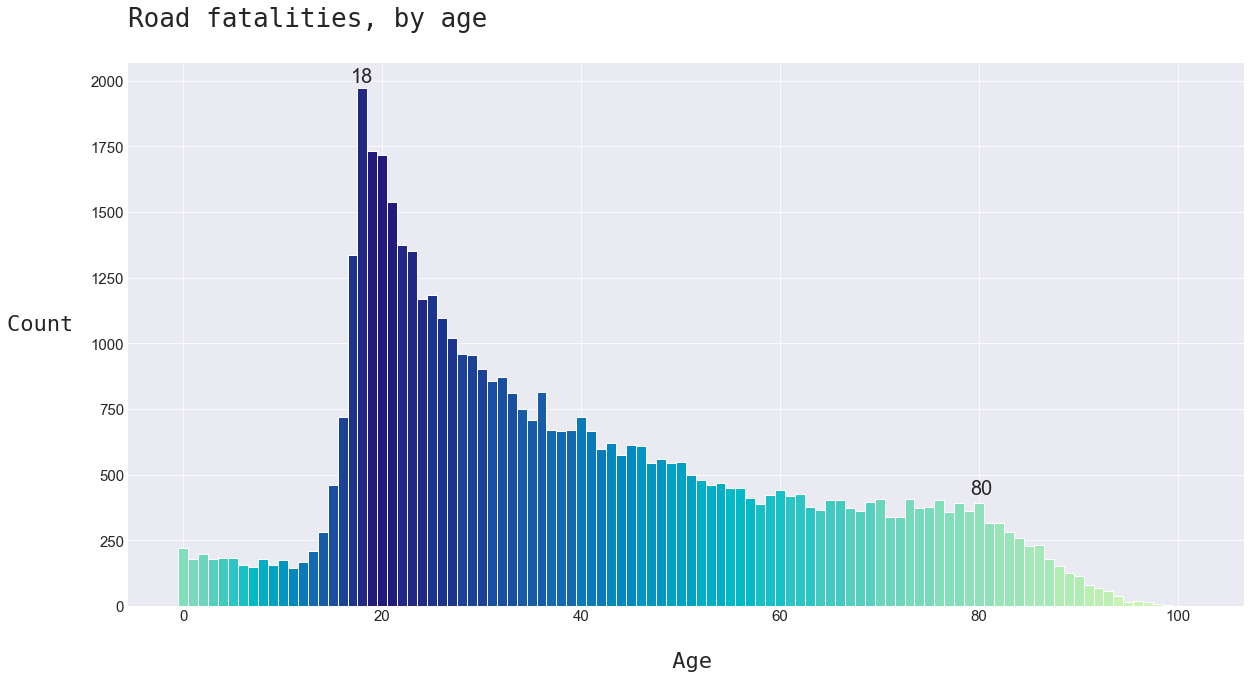

In [130]:
crashage()

In [131]:
yearcounts = dfinal["Year"].value_counts().reset_index().rename(columns = {'Year':'Count','index':'Year'})
yearcounts.sort_values('Year',ascending=False, inplace=True)
def crashyear():
    fig, ax = plt.subplots()  

    ax.barh(width=yearcounts["Count"], y=yearcounts["Year"],height=0.8, color=ygblongg)
    y=yearcounts["Year"]
    plt.yticks(np.arange(min(y), max(y)+1, 1.0,), fontsize=15)
    plt.xticks(fontsize=15)
    plt.title("Road fatalities, by year",fontsize=26,  family = 'monospace', loc='left')
    plt.xlabel('Count', fontsize=22,family = 'monospace')
    plt.ylabel('Year ', fontsize=22, rotation='horizontal', ha='right',family = 'monospace')

    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_width())
    # set individual bar lables using above list
    total = sum(totals)
    # set individual bar lables using above list
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+10, i.get_y()+.1, str(i.get_width()), fontsize=19,\
                color=ygblong[1])
    plt.xlim(0,3000)
    plt.subplots_adjust(bottom=0)
    
    return(plt.show())

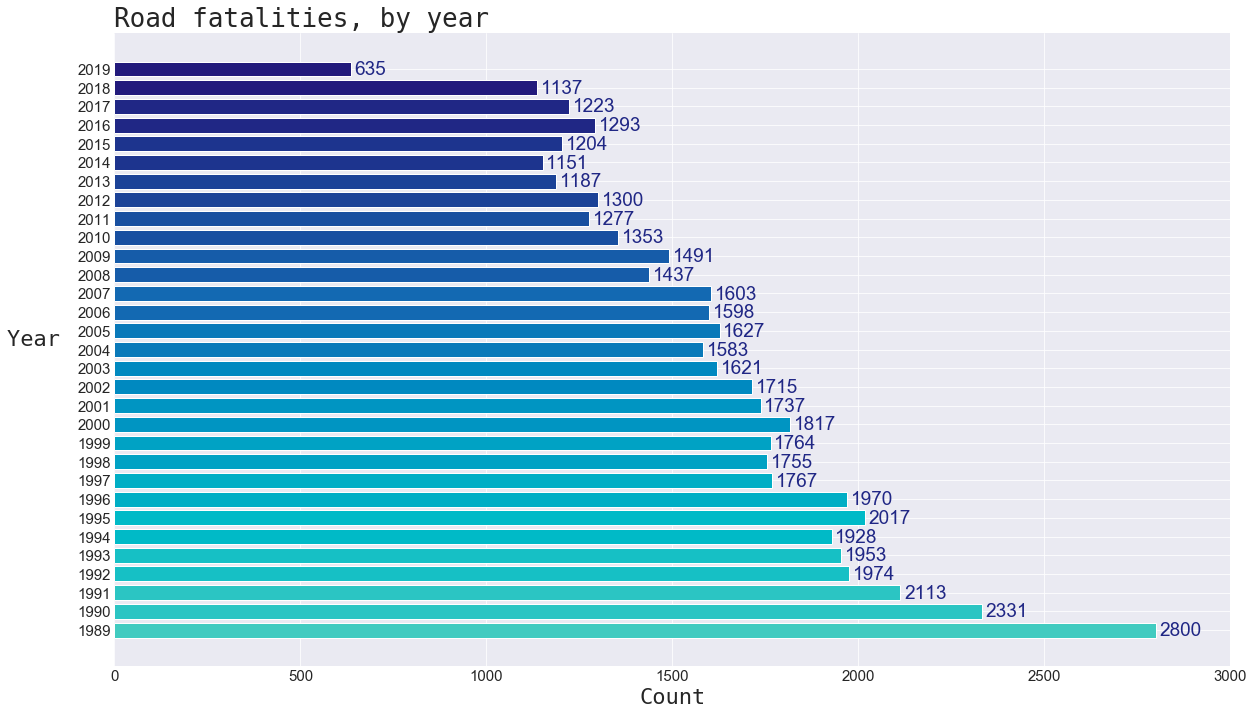

In [132]:
crashyear()

In [133]:
daycounts = dfinal["Dayweek"].value_counts().reset_index().rename(columns = {'Dayweek':'Count','index':'Dayweek'})
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = daycounts['Dayweek'].map(mapping)
daycounts = daycounts.iloc[key.argsort()]
daycounts.index = [0,1,2,3,4,5,6] 
daycounts

,Dayweek,Count
0,Monday,5819
1,Tuesday,5842
2,Wednesday,6328
3,Thursday,6764
4,Friday,8283
5,Saturday,9247
6,Sunday,8078


In [134]:
def crashesday():
    fig, ax = plt.subplots()  

    ax.barh(width=daycounts["Count"], y=daycounts["Dayweek"],height=0.8, color=ygb)
    y=daycounts["Dayweek"]
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title("Road fatalities, by day",fontsize=26,  family = 'monospace', loc='left')
    plt.xlabel('Count', fontsize=22,family = 'monospace')
    plt.ylabel('Day\n of\n week', fontsize=22, rotation='horizontal', ha='right',family = 'monospace')

    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_width())
    # set individual bar lables using above list
    total = sum(totals)
    # set individual bar lables using above list
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()-610, i.get_y() +0.45, str(i.get_width()), fontsize=19, family = 'monospace',\
                weight='bold',color='white', bbox={'facecolor': ygblong[0], 'alpha': .85, 'pad': 8})
    plt.style.use('seaborn-darkgrid')
    plt.subplots_adjust(bottom=0)
    plt.gca().invert_yaxis()
    return(plt.show())

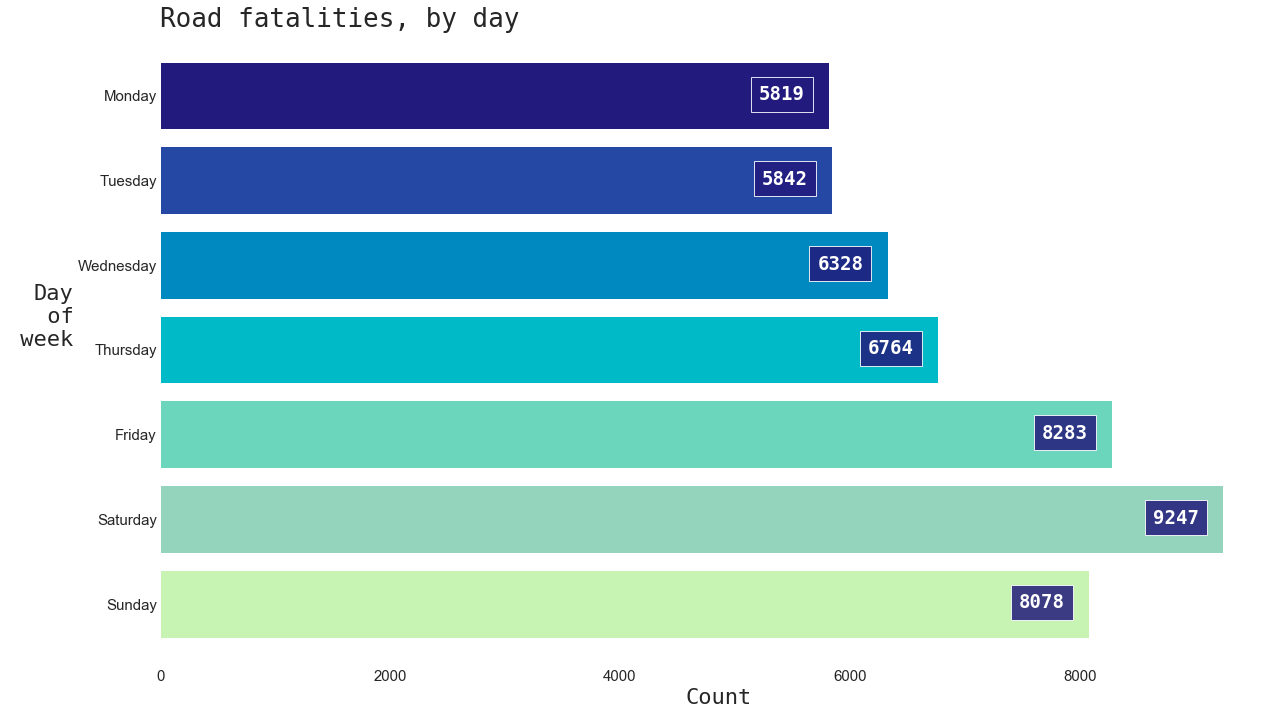

In [171]:
crashesday()

# Month Exploration


In [136]:
dmonth = dfinal["Month"].value_counts().reset_index().rename(columns = {'Month':'Count','index':'Month'})
dmonth.sort_values('Month', ascending=True, inplace=True)
ddmonth= dmonth.replace(list(range(1,13)), [monthslist[i] for i in range(0,12)])
ddmonth.index = [0,1,2,3,4,5,6,7,8,9,10,11] 
ddmonth 

,Month,Count
0,Jan,4153
1,Feb,3787
2,Mar,4472
3,Apr,4141
4,May,4292
5,Jun,4142
6,Jul,4034
7,Aug,4231
8,Sep,4081
9,Oct,4304


In [137]:
plt.style.use('seaborn-darkgrid')
def months(x):
    fig, ax = plt.subplots()
    x=int(x)
    plt.ylim(x,4600)
    plt.fill_between( x=ddmonth["Month"], y1=ddmonth['Count'], color=ygb[3], alpha=0.3)
    plt.plot(ddmonth['Count'], color=ygb[2], alpha=1, linewidth=4)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title("Road fatalities, by month\n",fontsize=26,  family = 'monospace', loc='left')
    plt.xlabel('\n Month', fontsize=22,family = 'monospace')
    plt.ylabel('Count ', fontsize=22, rotation='horizontal', ha='right',family = 'monospace')
    
    return(plt.show())


##### Created my first function that I could reuse

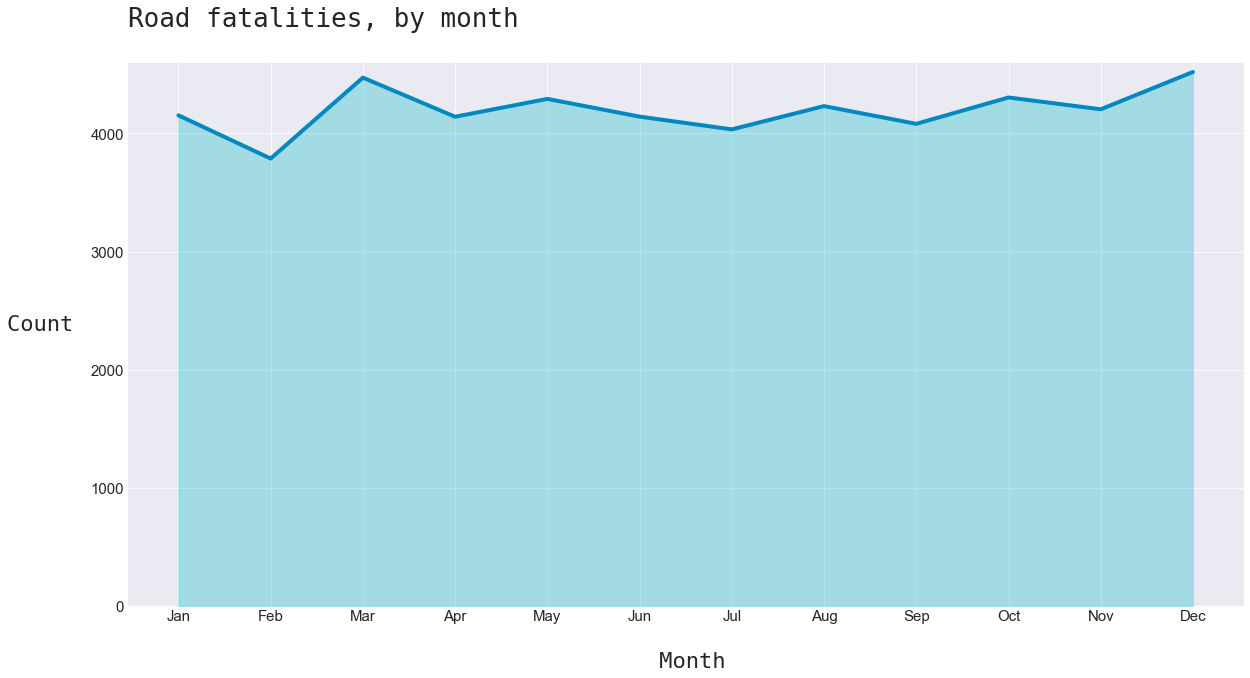

In [138]:
months(0)

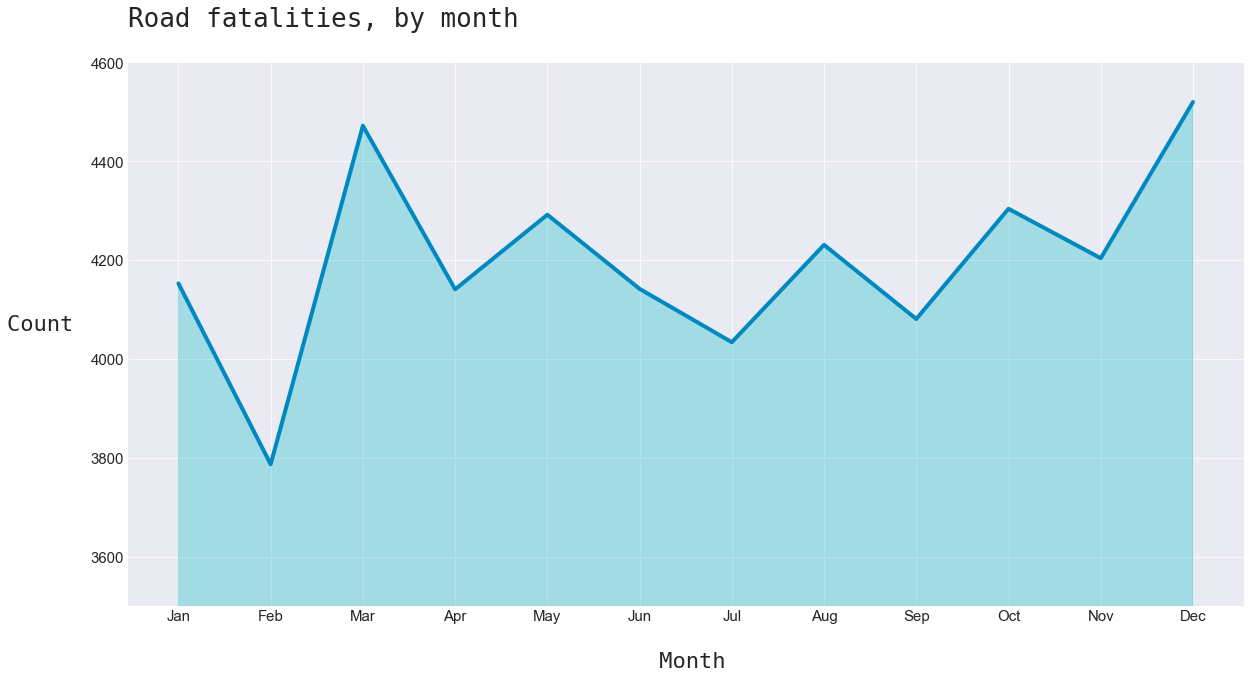

In [172]:
months(3500)

### Accounting for differing month lengths

In [140]:
monthlengthlist =[31,28.5,31,30,31,30,31,31,30,31,30,31]
ddmonthstd= ddmonth.replace([i for i in ddmonth['Count']], \
                            [ddmonth['Count'][i]/monthlengthlist[i] for i in range(0,12)])
ddmonthstd

,Month,Count
0,Jan,133.967742
1,Feb,132.877193
2,Mar,144.258065
3,Apr,138.033333
4,May,138.451613
5,Jun,138.066667
6,Jul,130.129032
7,Aug,136.483871
8,Sep,136.033333
9,Oct,138.838710


### Normalising this data

In [141]:
# Create xm, where xm is the 'Count' column's values as floats
xm = ddmonthstd[['Count']].values.astype(float)
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(xm)
# Run the normaliser on the dataframe
month_normalized = pd.DataFrame(x_scaled)
month_normalized =month_normalized.rename(columns = {0:'Count',})

In [142]:
def monthnorm():
    fig, ax = plt.subplots()
    plt.fill_between( x=ddmonthstd["Month"], y1=month_normalized['Count'], color=ygb[3], alpha=0.3)
    plt.plot(month_normalized['Count'], color=ygb[2], alpha=1, linewidth=4)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title("Road fatalities, by month - Normalised \n",fontsize=26,  family = 'monospace', loc='left')
    plt.xlabel('\n Month', fontsize=22,family = 'monospace')
    plt.ylabel('Normalised ', fontsize=22, rotation='horizontal', ha='right',family = 'monospace')
    plt.style.use('seaborn-darkgrid')
    return(plt.show())

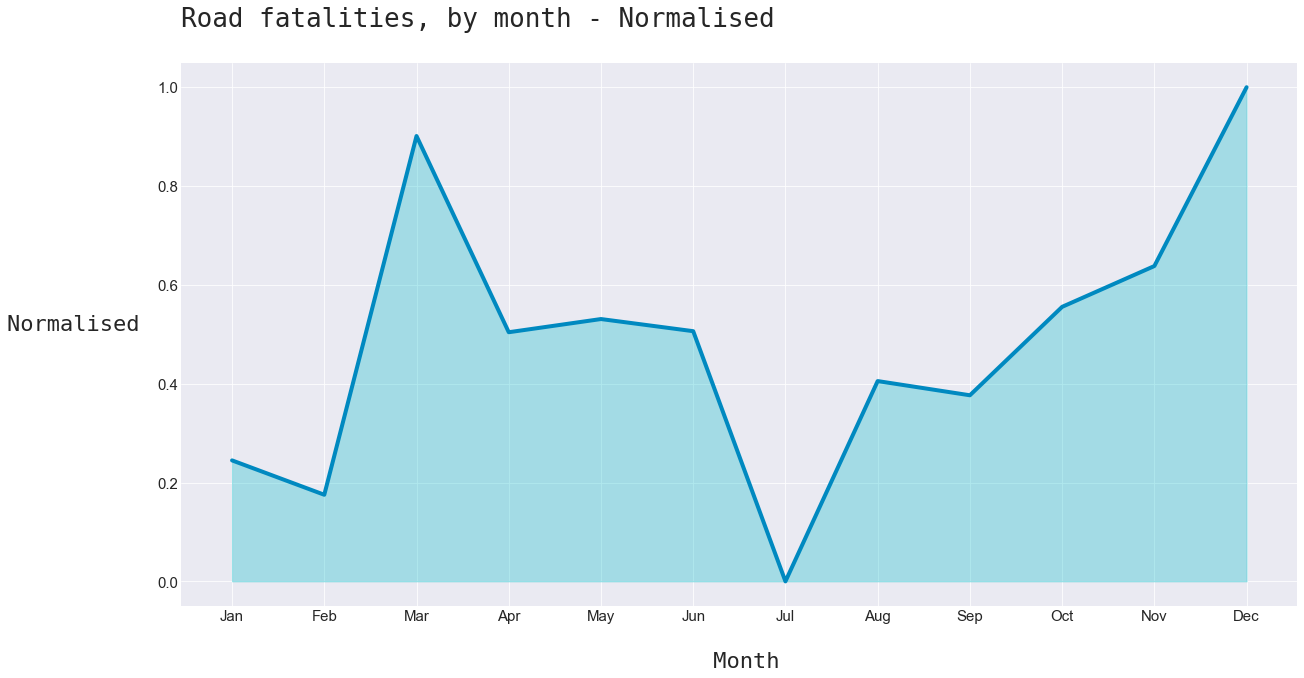

In [143]:
monthnorm()

# March & December : Worst months to be on the roads


# January , February  &  July  : Statistically safer months

# Worst state? 

In [175]:
plt.style.use('seaborn-darkgrid')
def statevstate():
    fig, ax = plt.subplots()
    dfinal["State"].value_counts().plot(kind="bar", color=ygbb)
    
    plt.style.use('seaborn-darkgrid')
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15, rotation='horizontal')
    plt.title("Road fatalities, by state",fontsize=26,  family = 'monospace', loc='left')
    plt.xlabel('State / Territory', fontsize=22,family = 'monospace')
    plt.ylabel('Number \n of \n Fatalities ', fontsize=22, rotation='horizontal', ha='right',family = 'monospace')

    
#     for p in ax.patches:
#         height = p.get_height()
#         ax.text(p.get_x()+p.get_width()/2., height + 3,'{:1.2f}'.format(height/total),ha="center", fontsize=24, color=ygb[1]) 


    return(plt.show())

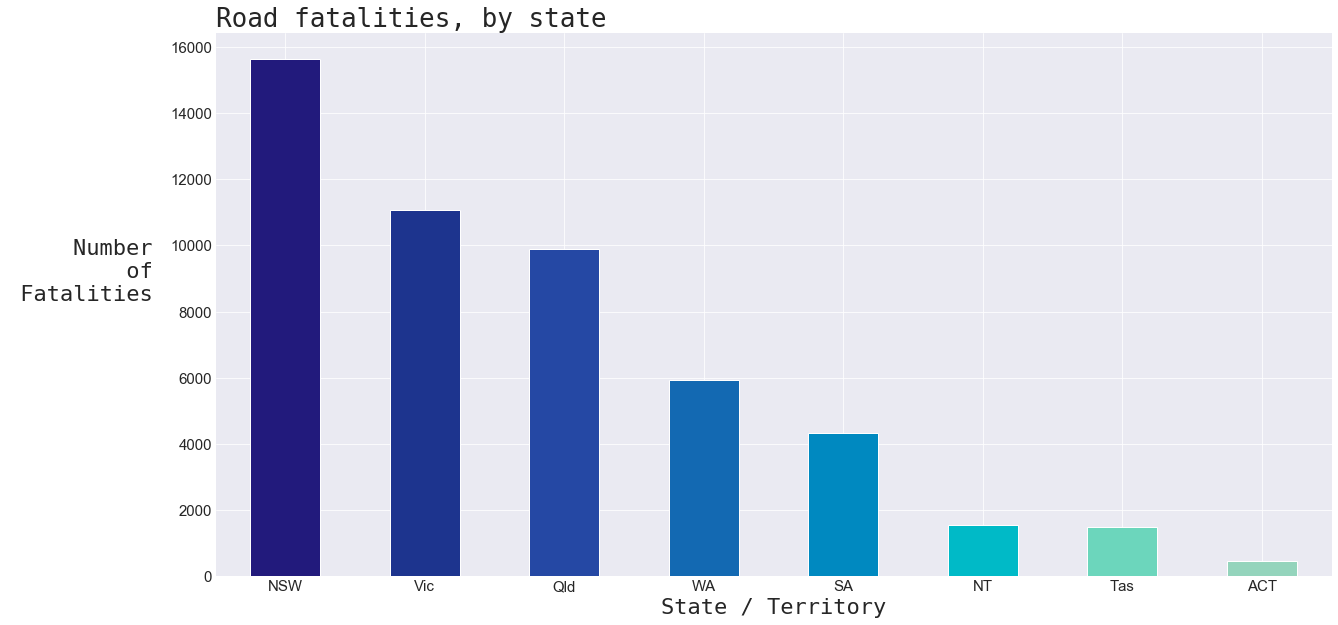

In [176]:
statevstate()

#### Population differences? ABS time.

In [177]:
def normstate():
    df2018 = dfinal[dfinal.Year == 2018]
    df2018

    statepop = {"NSW":7988129, 'Vic':6461053, 'Qld': 5011545, \
                'WA': 2594712, 'SA':1736257 , 'NT': 528170 , 'Tas': 247389	, 'ACT':420856	}
    statedeath= df2018["State"].value_counts().reset_index().rename(columns = \
                                {'State':'Count','index':'State'})

    statevpop= statedeath.replace([i for i in statedeath['Count']], \
                                [statedeath['Count'][i]/statepop[statedeath['State'][i]] for i in range(0,8)])


    # Create x, where x the 'scores' column's values as floats
    xmm = statevpop[['Count']].values.astype(float)
    # Create a minimum and maximum processor object
    min_max_scaler = preprocessing.MinMaxScaler()
    # Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(xmm)
    # Run the normalizer on the dataframe
    statenorm = pd.DataFrame(x_scaled)
    statenorm =statenorm.rename(columns = {0:'Count',})

    statevpop['Count'] = statenorm['Count']


    statevpop.plot('State', 'Count', kind="bar", color=ygbb)

    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15, rotation='horizontal')
    plt.title("Road fatalities, by state, 2018 - Normalised",fontsize=26,  family = 'monospace', loc='left')
    plt.xlabel('State / Territory', fontsize=22,family = 'monospace')
    plt.ylabel('Normalised ', fontsize=22, rotation='horizontal', ha='right',family = 'monospace')
    plt.legend('')
    plt.style.use('seaborn-darkgrid')


    return(plt.show())

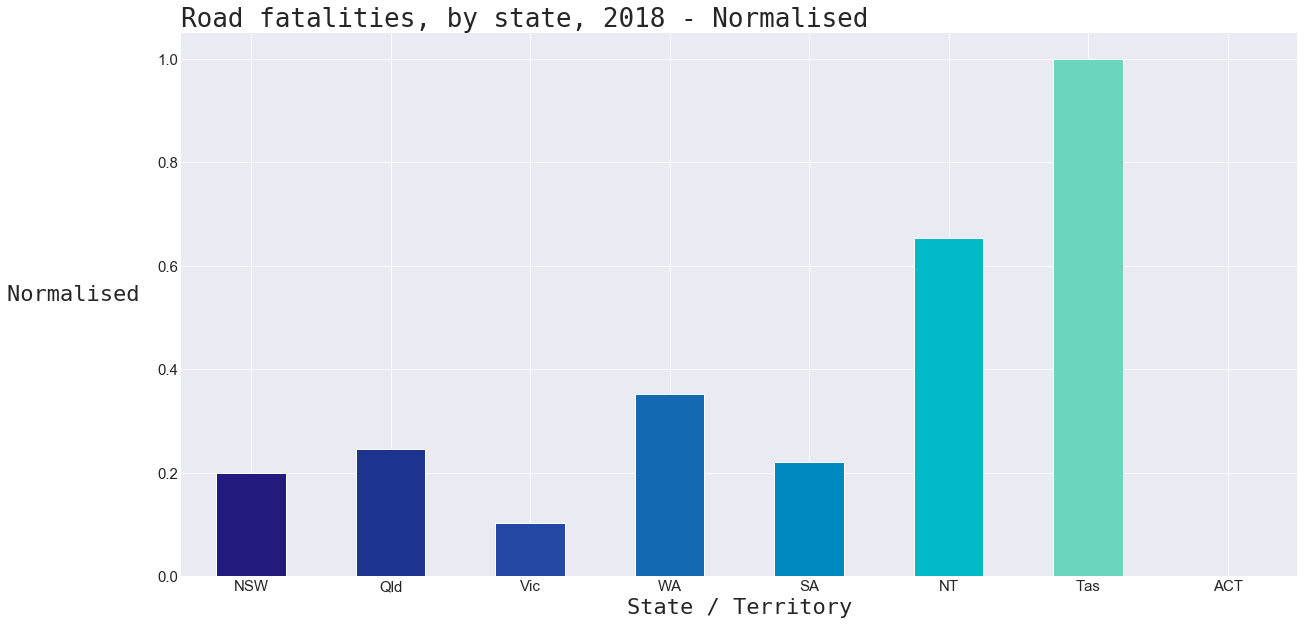

In [178]:
normstate()

In [148]:
lgacount = dfinal["National LGA Name 2017"].value_counts().reset_index().rename(columns = {'National LGA Name 2017':'Count','index':'LGA'})
lgacount.sort_values('Count',ascending=False, inplace=True)
lgacount = lgacount.head(100)
lgacount['State'] =lgacount['LGA'].str[:15]

lgacount
def treemap(df):
    cmap = matplotlib.cm.YlGnBu
    mini=min(df['Count'])
    maxi=max(df['Count'])
    norm = matplotlib.colors.Normalize(vmin=(mini-30), vmax=(maxi+5))
    colors = [cmap(norm(value)) for value in lgacount['Count']]
    squarify.plot(sizes=df['Count'], label=df['State'], alpha=1,color=colors, text_kwargs={'fontsize':10, 'color':'white', 'weight':'bold'})
    plt.axis('off')
#     plt.title()
    return(plt.show())


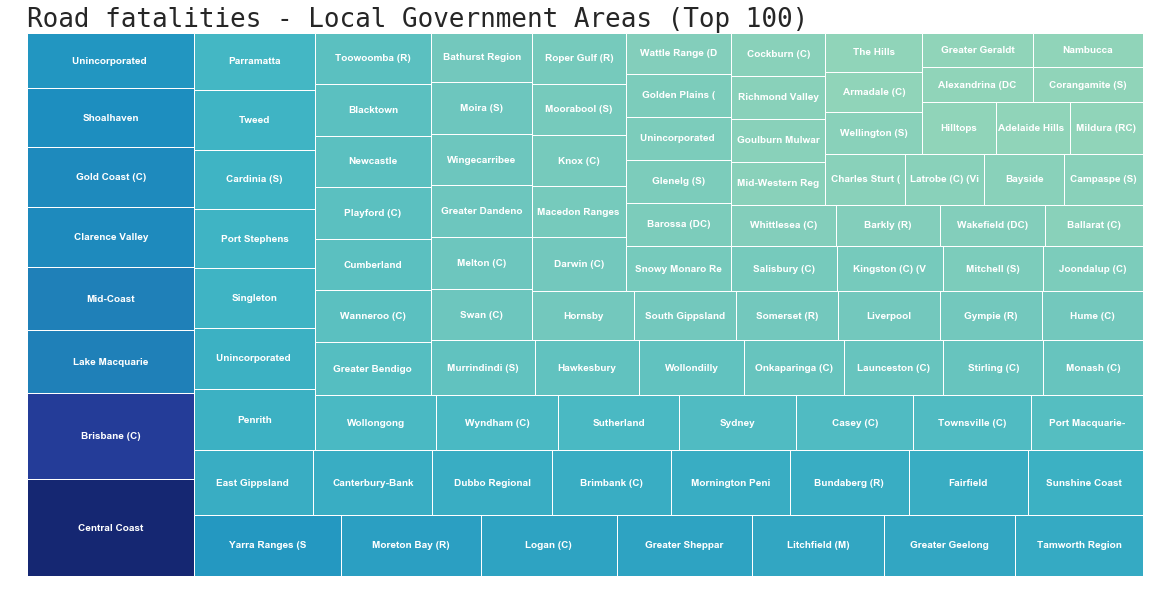

In [149]:
plt.title("Road fatalities - Local Government Areas (Top 100)", fontsize=26,  family = 'monospace', loc='left')
treemap(lgacount)


In [150]:
pd.options.mode.chained_assignment = None
lgacount = dfinal["National LGA Name 2017"].value_counts().reset_index().rename(columns = \
                                        {'National LGA Name 2017':'Count','index':'National LGA Name 2017'})
lgacount.sort_values('Count',ascending=False, inplace=True)
lgacount = lgacount.head(100)
    
statelg = dfinal[['National LGA Name 2017', 'State']]
statelg.drop_duplicates(subset ="National LGA Name 2017",keep = 'first', inplace = True)
statebylga = lgacount.merge(statelg, on="National LGA Name 2017", how = 'inner')
statebylga.head()


,National LGA Name 2017,Count,State
0,Central Coast,68,NSW
1,Brisbane (C),60,Qld
2,Lake Macquarie,44,NSW
3,Mid-Coast,44,NSW
4,Clarence Valley,42,NSW


In [151]:
def statemap():
    cmap = matplotlib.cm.YlGnBu
    cmap = matplotlib.cm.YlGnBu
    mini=min(statebylga['Count'])
    maxi=max(statebylga['Count'])
    norm = matplotlib.colors.Normalize(vmin=(mini-40), vmax=(maxi+5))
    colors = [cmap(norm(value)) for value in statebylga['Count']]
    squarify.plot(sizes=statebylga['Count'], label=statebylga['State'], alpha=1,color=colors, text_kwargs={'fontsize':12, 'color':'white', 'weight':'bold'})
    plt.axis('off')
    plt.title("States of Top 100 Most Frequent Local Government Areas",fontsize=26,  family = 'monospace', loc='left')
    return(plt.show())

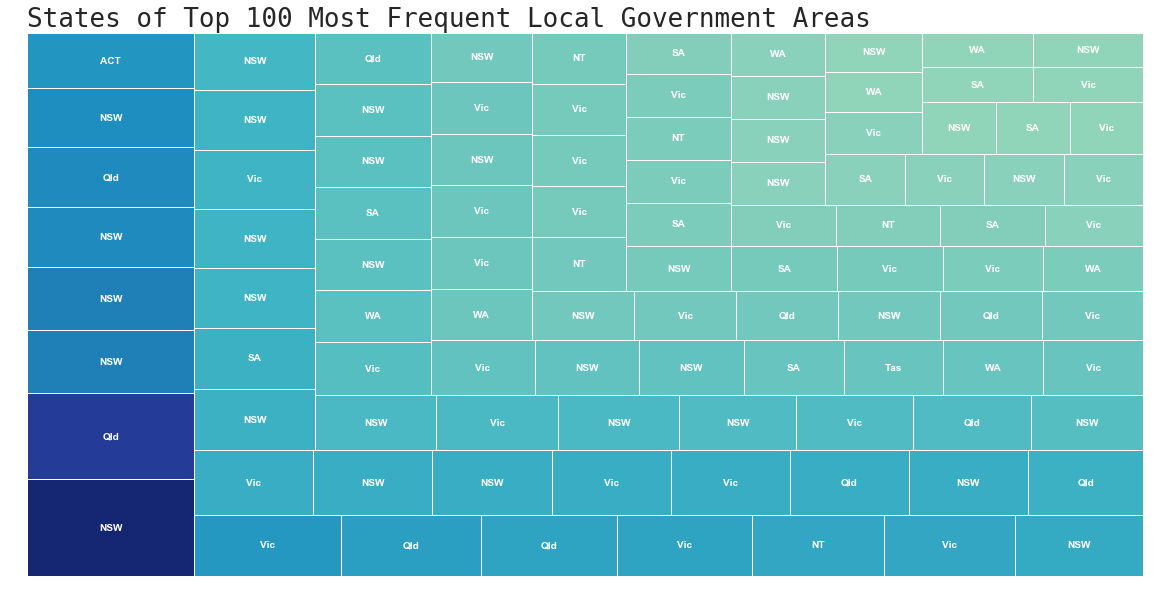

In [152]:
plt.title("States of Top 100 Most Frequent Local Government Areas",fontsize=26,  family = 'monospace', loc='left')
treemap(statebylga)
#function reused

#### When population is considered, road law enforcement in metropolitan states shines through.

In [153]:
def buscrash():
    fig, ax = plt.subplots()

    statebar=dfinal["Bus Involvement"].value_counts().plot(kind="bar", color=[ygb[2],ygb[4]])

    plt.yticks(fontsize=15)
    plt.xticks(fontsize=20, rotation='horizontal')
    plt.title("Was a Bus Involved in the Crash?",fontsize=26,  family = 'monospace', loc='left')
    plt.xlabel('Was a Bus Involved?', fontsize=22,family = 'monospace')
    plt.ylabel('Number \n of \n Crashes ', fontsize=22, rotation='horizontal', ha='right',family = 'monospace')

    plt.style.use('seaborn-darkgrid')
    total = float(len(dfinal))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 3,'{:1.2f}'.format(height/total),ha="center",bbox={'facecolor': ygblong[0], 'alpha': .85, 'pad': 8}, fontsize=24, color='w') 


    return(plt.show())

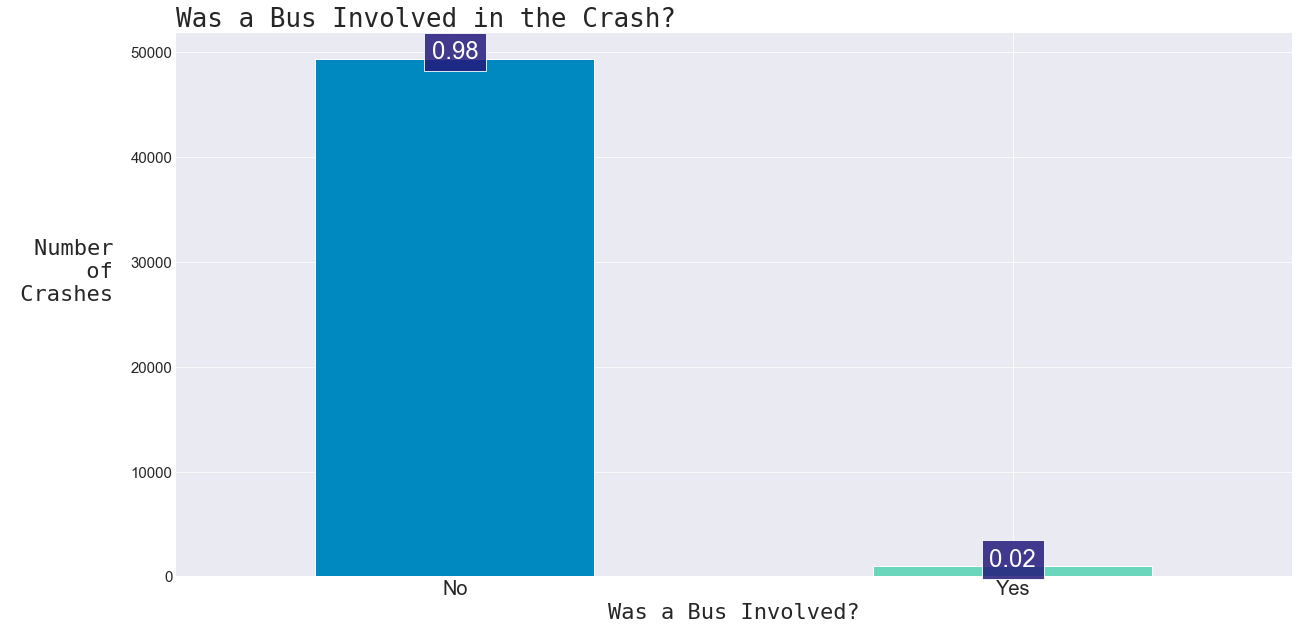

In [154]:
buscrash()

# Bus = Safe?

In [155]:
def fatalitypercrash():
    fig, ax = plt.subplots()
    crashdf["Number Fatalities"].value_counts().plot(kind="bar", width=0.8, color = ygb)
    crashdf.sort_values('Number Fatalities',ascending=True, inplace=True)
    plt.yticks(fontsize=15)
    plt.xticks(np.arange(12), (' 1', ' 2', ' 3', ' 4', ' 5',' 6',' 7',' 10',' 11',' 12',' 20',' 35'),fontsize=15,rotation='horizontal')
    plt.title("How Many Victims In a Crash?",fontsize=26,  family = 'monospace', loc='left')
    plt.xlabel('Fatality Count Per Crash', fontsize=22,family = 'monospace')
    plt.ylabel('Number \n of \n Crashes ', fontsize=22, rotation='horizontal', ha='right',family = 'monospace')
    plt.style.use('seaborn-darkgrid')
    for p in ax.patches:
        ax.annotate(str(" "+str(p.get_height())), (p.get_x() * 1.005, p.get_height() * .955005),\
                    bbox={'facecolor': ygblong[0], 'alpha': .85, 'pad': 8}, fontsize=20, color='w')
    return(plt.show())

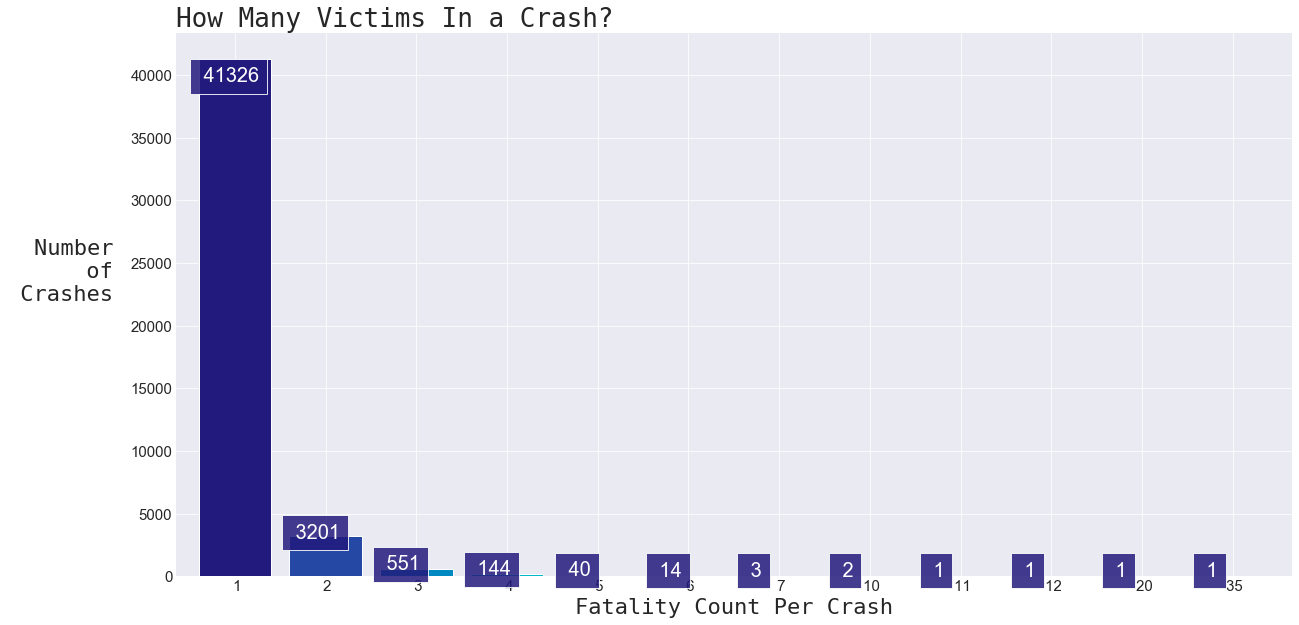

In [156]:
fatalitypercrash()
#uses the crash data csv rather than the merged df to skip skew by multiple victims per crash

<img src="Kempseybuscrash.png">

In [157]:
KEMPSEY = dfinal.loc[dfinal['Number Fatalities'] == 35]
KEMPSEY.sample(4)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number Fatalities,Bus Involvement,Heavy Rigid Truck Involvement,...,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Weekday or Weekend,Day or Night,Road User,Gender,Age,Age Group
47638,19891474,NSW,12,1989,Friday,3:30,Multiple,35,Yes,No,...,NaN,NaN,No,No,Weekday,Night,Passenger,Female,26,26_to_39
47645,19891474,NSW,12,1989,Friday,3:30,Multiple,35,Yes,No,...,NaN,NaN,No,No,Weekday,Night,Passenger,Male,18,17_to_25
47640,19891474,NSW,12,1989,Friday,3:30,Multiple,35,Yes,No,...,NaN,NaN,No,No,Weekday,Night,Passenger,Male,23,17_to_25
47653,19891474,NSW,12,1989,Friday,3:30,Multiple,35,Yes,No,...,NaN,NaN,No,No,Weekday,Night,Passenger,Female,51,40_to_64


In [158]:
KEMPSEY.iloc[1]

Crash ID                          19891474
State                                  NSW
Month                                   12
Year                                  1989
Dayweek                             Friday
Time                                  3:30
Crash Type                        Multiple
Number Fatalities                       35
Bus Involvement                        Yes
Heavy Rigid Truck Involvement           No
Articulated Truck Involvement           No
Speed Limit                            100
National Remoteness Areas              NaN
SA4 Name 2016                          NaN
National LGA Name 2017                 NaN
National Road Type                     NaN
Christmas Period                        No
Easter Period                           No
Weekday or Weekend                 Weekday
Day or Night                         Night
Road User                        Passenger
Gender                                Male
Age                                     38
Age Group  

In [159]:
genpo= dfinal[['Year', 'Gender']]
genpo= genpo.groupby(['Year','Gender']).size().reset_index().rename(columns={0:'Freq'})
genbool = ["Female" in x for x in genpo['Gender']] 
female = genpo[genbool]
female = female.rename(columns={'Gender':'Female', 'Freq':'FemaleFreq'})
genbob = ["Male" in x for x in genpo['Gender']]
male = genpo[genbob]
male = male.rename(columns={'Gender':'Male', 'Freq':'MaleFreq'})
gender = male.merge(female, on='Year', how='inner' )

def genplot():
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title("Fatality Count by Gender",fontsize=26,  family = 'monospace', loc='left')
    plt.xlabel('Year', fontsize=22,family = 'monospace')
    plt.ylabel('Number \n of \n Fatalities ', fontsize=22, rotation='horizontal', ha='right',family = 'monospace')
    plt.plot( 'Year', 'MaleFreq', data=gender, marker='o', markerfacecolor=ygb[2], markersize=12, color=ygb[3], linewidth=3)
    plt.plot( 'Year', 'FemaleFreq', data=gender, marker='o',markerfacecolor=ygb[3], markersize=12, color=ygb[4], linewidth=3)

    plt.legend(fontsize=23)
    return(genplot)

# plt.text(10.2, gender.MaleFreq.tail(1), 'Mr Orange', horizontalalignment='left', size='small', color='orange')

<function __main__.genplot()>

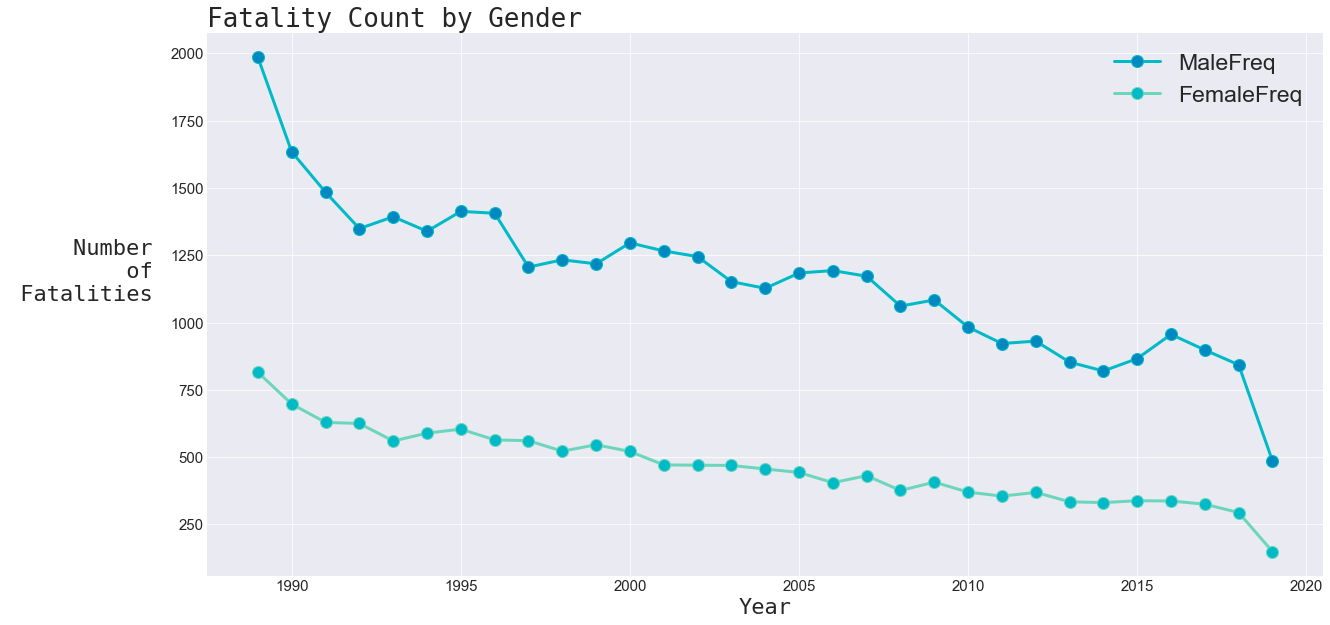

In [160]:
genplot()

# Looking into fatal time trends

In [161]:
pd.options.mode.chained_assignment = None
TimeVMonth = dfinal[['Time', 'Month']]#making df with just the columns of interest
TimeVMonth['Time'] = TimeVMonth.Time.apply(lambda x: x[0:2])
#renames time to just be the first 2 characters (hour)
TimeMonthValues = TimeVMonth.groupby(['Month', \
                                'Time']).size().reset_index().rename(columns={0:'Freq'})
    #This groups the two columns where they are the same 
    #and checking the size of this returns the number of unique groups:
    #reset index restores the grouped columns then renames the column "Freq"
for i in range(0,10):
    i = str(i)
    TimeMonthValues['Time'].replace([i+":"], '0'+i,inplace=True) 
    #renames> introduce "0" before single digits 
TimeMonthValues.head()

,Month,Time,Freq
0,1,00,146
1,1,10,170
2,1,11,198
3,1,12,226
4,1,13,190


In [162]:
def freqbymonthtime():
    fig, ax = plt.subplots()
    heatmap1_data = pd.pivot_table(TimeMonthValues, values='Freq', 
                         index=['Month'], 
                         columns='Time')
    sns.heatmap(heatmap1_data, cmap="YlGnBu")
    labels = [item.get_text() for item in ax.get_yticklabels()]
    for i in range (0,12):
        labels[i] = monthslist[i]
    ax.set_yticklabels(labels, rotation='horizontal')
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    
    plt.title("Crash frequency by hour throughout the year \n", fontsize=24,  family = 'monospace',loc='left')
    plt.xlabel('\n Time', fontsize=20,family = 'monospace')
    plt.ylabel('Month ', fontsize=20, rotation='horizontal', ha='right',family = 'monospace')
    return(plt.show())

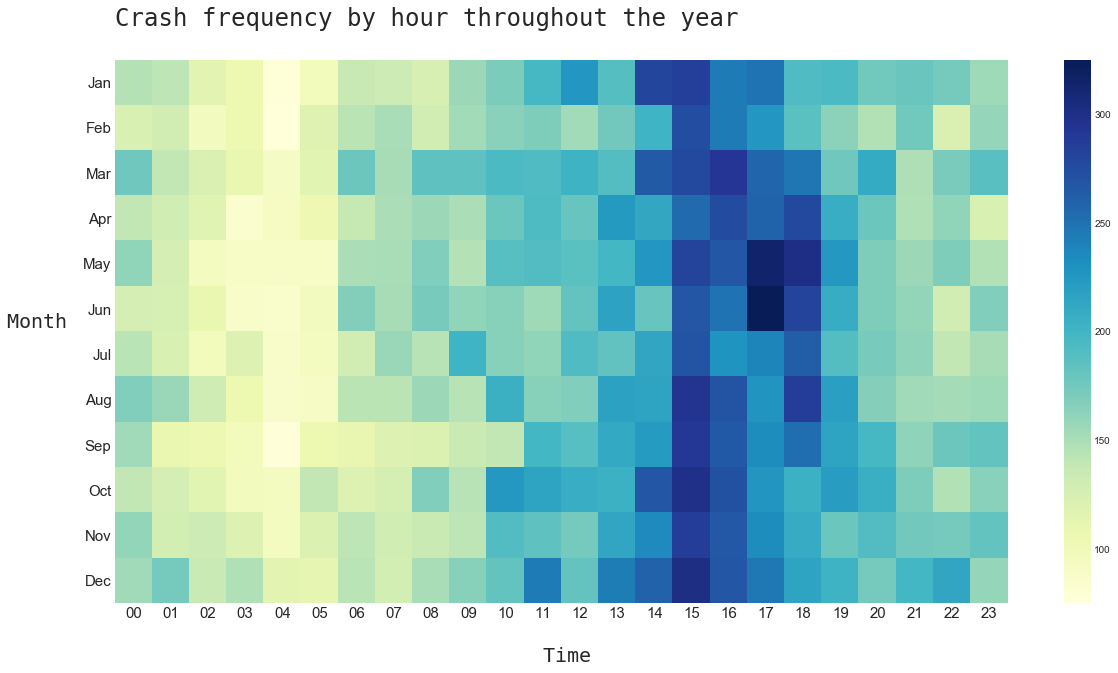

In [163]:
freqbymonthtime()

In [173]:
def roaduser():

    typecount = dfinal["Road User"].value_counts().reset_index().rename(columns = {'Road User':'Count','index':'Road User'})
    fig, ax = plt.subplots()  

    ax.barh(width=typecount["Count"], y=typecount["Road User"],height=0.8, color=ygb)
    y=typecount["Road User"]
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title("Road fatalities, by road user",fontsize=26,  family = 'monospace', loc='left')
    plt.xlabel('Count', fontsize=22,family = 'monospace')
    plt.ylabel('Road\n User', fontsize=22, rotation='horizontal', ha='right',family = 'monospace')

    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_width())
    # set individual bar lables using above list
    total = sum(totals)
    # set individual bar lables using above list
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width(), i.get_y() +0.45, str(i.get_width()), fontsize=19, family = 'monospace',\
                weight='bold',color='white', bbox={'facecolor': ygblong[0], 'alpha': .85, 'pad': 8})
    plt.style.use('seaborn-darkgrid')
    plt.subplots_adjust(bottom=0)
    plt.gca().invert_yaxis()
    return(plt.show())

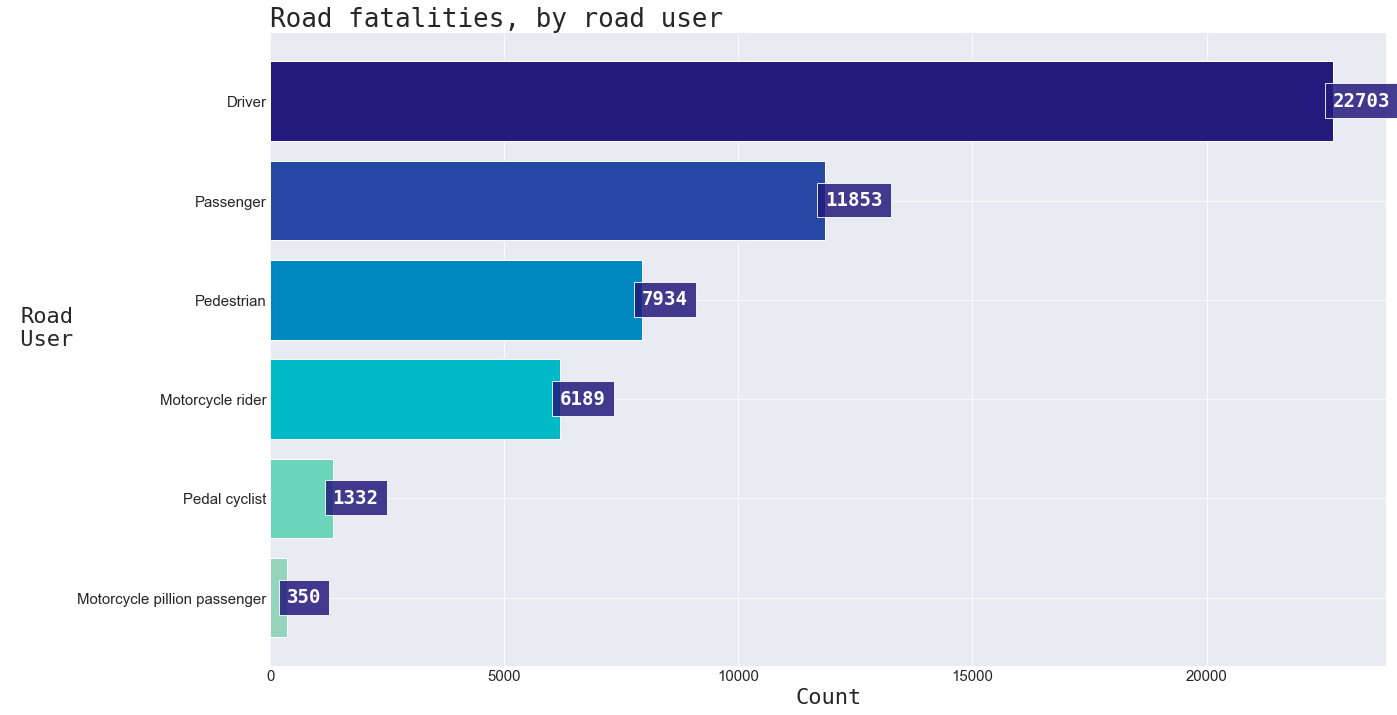

In [174]:
roaduser()

Together pedestrians, passengers and cyclists account for 44 per cent of fatalities on our roads. That’s nearly the same proportion as drivers, which account for 45 per cent of deaths.

In [166]:
def timevsmonth(roaduser):
    pd.options.mode.chained_assignment = None
    string = roaduser
    pattern_of_boolscyc = [string in x for x in dfinal['Road User']] 
    cyc_crash = dfinal[pattern_of_boolscyc] #getting a dataframe of just the driver ppl

    cyc_time = cyc_crash[['Time', 'Month']] 
    cyc_time['Time'] = cyc_time.Time.apply(lambda x: x[0:2]) 
    cyc_tvm = cyc_time.groupby(['Month','Time']).size().reset_index().rename(columns={0:'Freq'}) 


    for i in range(0,10):
        i = str(i)
        cyc_tvm['Time'].replace([i+":"], '0'+i,inplace=True)
        
    fig, ax = plt.subplots()
    heatmap3_data = pd.pivot_table(cyc_tvm, values='Freq', 
                         index=['Month'], 
                         columns='Time')
    fig.canvas.draw()

    sns.heatmap(heatmap3_data, cmap="YlGnBu")
    labels = [item.get_text() for item in ax.get_yticklabels()]

    for i in range (0,12):
        labels[i] = monthslist[i]

    ax.set_yticklabels(labels, rotation='horizontal')
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title((string+" Frequency \n"), fontsize=24,  family = 'monospace', loc='left')
    plt.xlabel('\n Time', fontsize=20,family = 'monospace')
    plt.ylabel('Month ', fontsize=20, rotation='horizontal', ha='right',family = 'monospace')
    sns.set_style("white")
    return(plt.show())


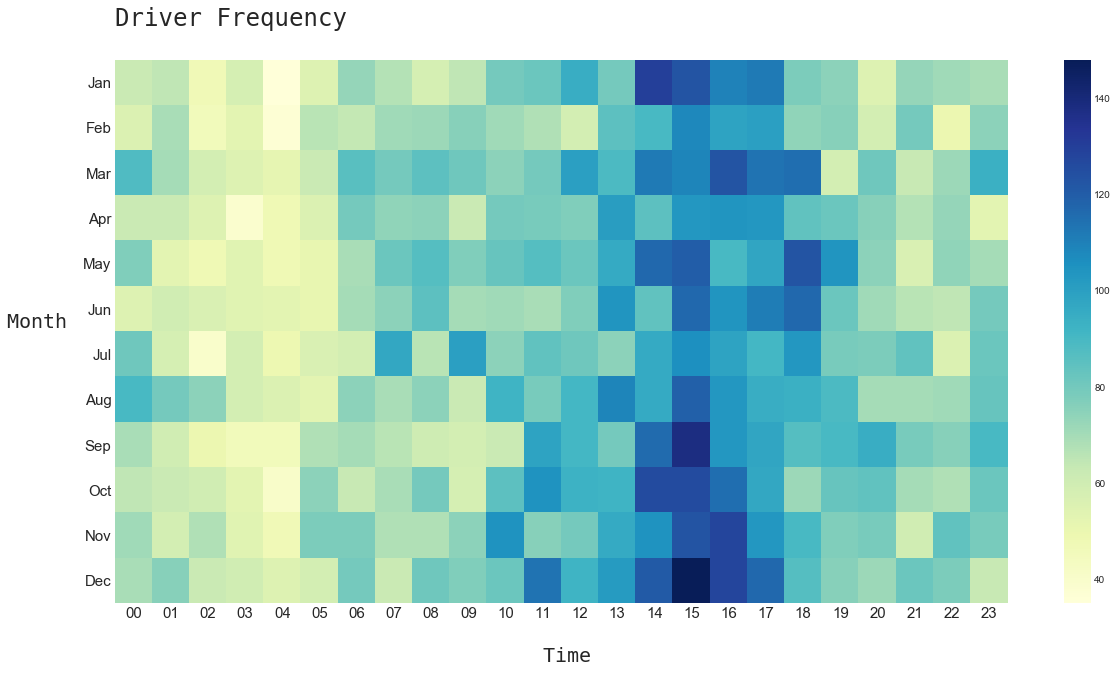

In [167]:
timevsmonth('Driver')

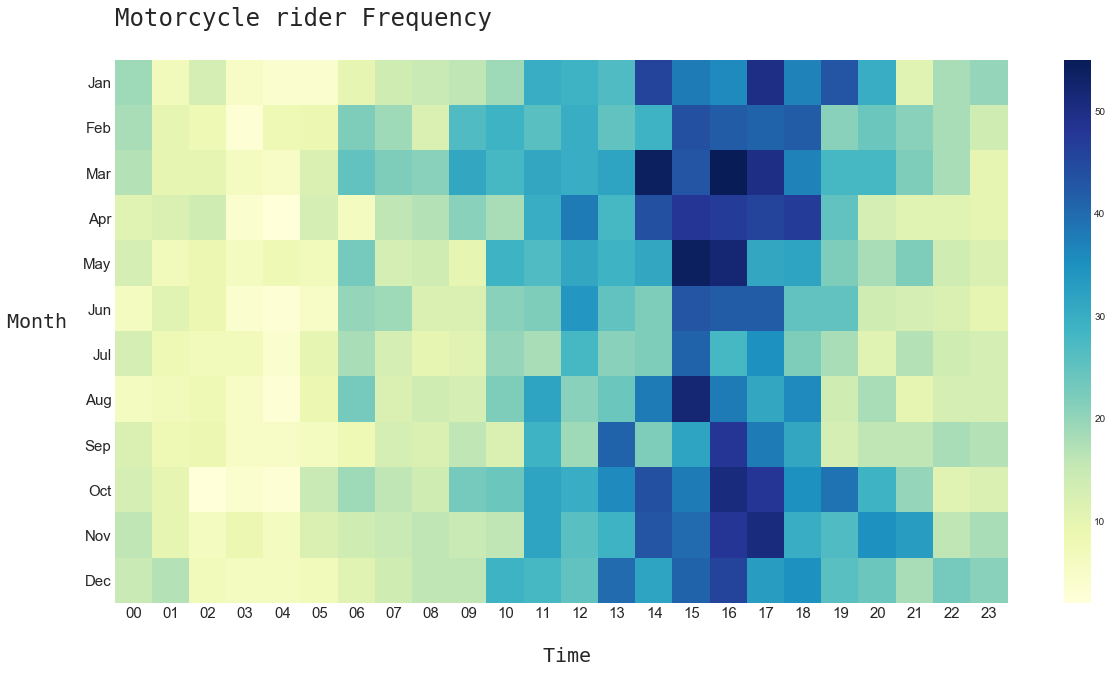

In [168]:
timevsmonth('Motorcycle rider')

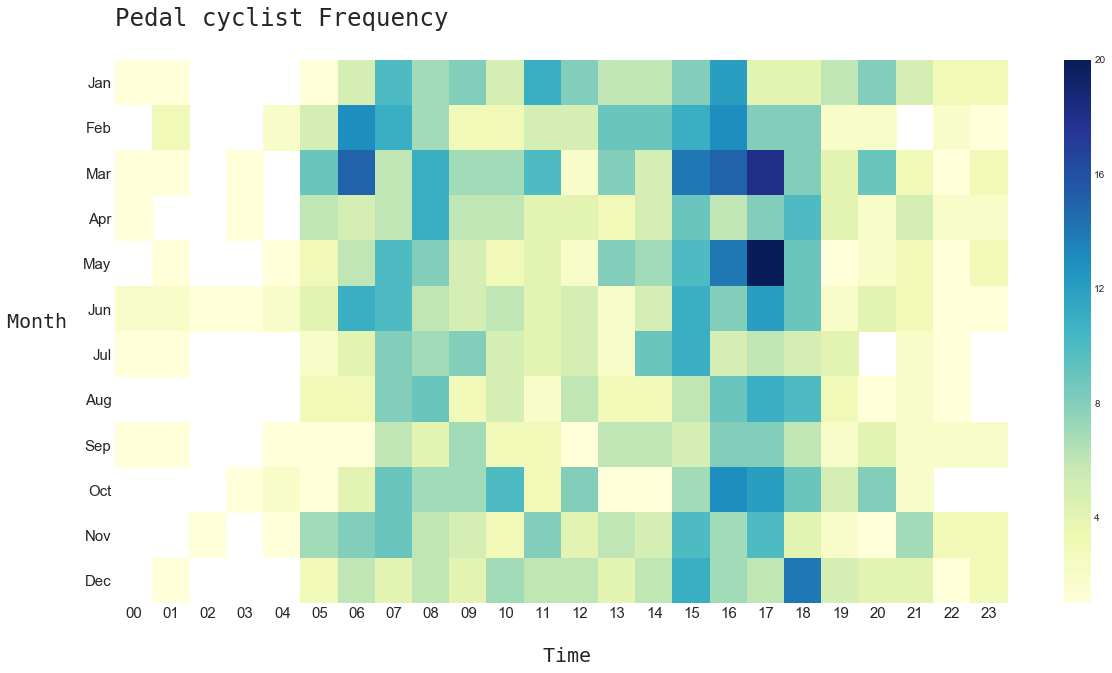

In [169]:
timevsmonth('Pedal cyclist')

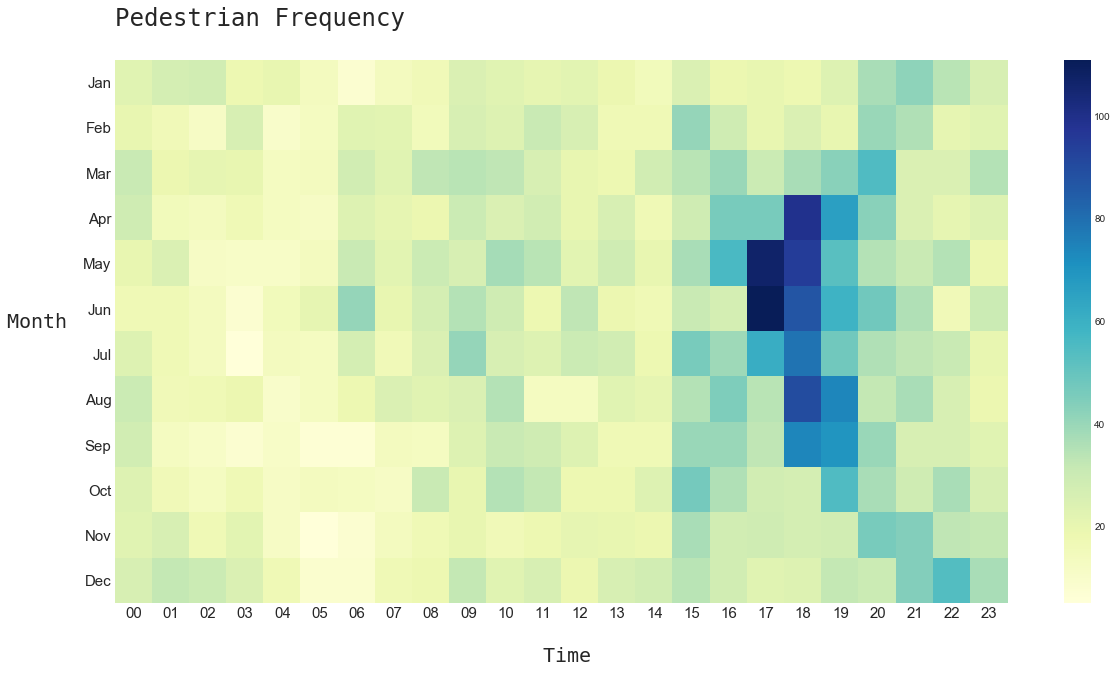

In [170]:
timevsmonth('Pedestrian')

# In conclusion

 - Do not be an 18-25 year old man in NSW driving at 4pm in December from Friday-Sunday.

- The safest among us are female cyclists riding between 11pm-5am in July within ACT.

- Well designed roads and laws are key to a safer society.

- Being alert on the roads is key above all else.